# Trabajo Final Inteligencia Artificial I - año 2018: Visión Artificial
---

# Dependencias
---

In [3]:
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

from skimage import io, color, img_as_float, img_as_ubyte, filters
from skimage.feature import hog
import os
import mahotas
import cv2

## Funciones definidas

* Representación:

In [4]:
def img2grey(image, mode='sk'):
    if (mode=='sk'):
        gray = color.rgb2gray(image)
    elif (mode=='cv'):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

def normSize(image, size=(tuple((100, 100)))):
    image = cv2.resize(image, size)
    return image

In [23]:
def float2int(image):
    new = np.zeros(image.shape, np.int8)
    for i in range(0, img.shape[0]-1):
        for j in range(0, img.shape[1]-1):
            new[i][j] = int(round(image[i][j]*255))
    return new

* Filtración:

In [33]:
def imgClean(image, sigma=1, mode='cv'):
    if (mode == 'cv'):
        clean = cv2.GaussianBlur(image,(3,3),0)
    else:
        clean = filters.gaussian(image, sigma)
    return clean

def imgEdge(image, sigma=1):
    aux = imgClean(image, sigma)
    edge = filters.sobel(aux)
    return edge

* Extracción de características:

In [6]:
def hu_moments(image):
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

def haralick(image):
    feature= mahotas.features.haralick(image).mean(axis=0)
    return feature

## Información global

In [7]:
data_path = './data'

# Importar base de datos
---

## Labels

Se obtiene el label de cada categoría y se lo ordena alfabeticamente. Los labels están dado por la estructura de carpetas: las imágenes de naranjas están en la carpeta "[orange](./data/orange)", las de bananas en la carpeta "[banana](./data/banana)" y las de limones en la carpeta "[lemon](./data/lemon)", todo esto dentro de la carpeta "[data](./data)".

In [7]:
data_labels = os.listdir(data_path)

data_labels.sort()
print(data_labels)

['banana', 'fruits-360', 'lemon', 'orange']


In [34]:
banana = io.ImageCollection('./data/banana/*.png:./data/banana/*.jpg')
orange = io.ImageCollection('./data/orange/*.png:./data/orange/*.jpg')
lemon = io.ImageCollection('./data/lemon/*.png:./data/lemon/*.jpg')

## Bananas

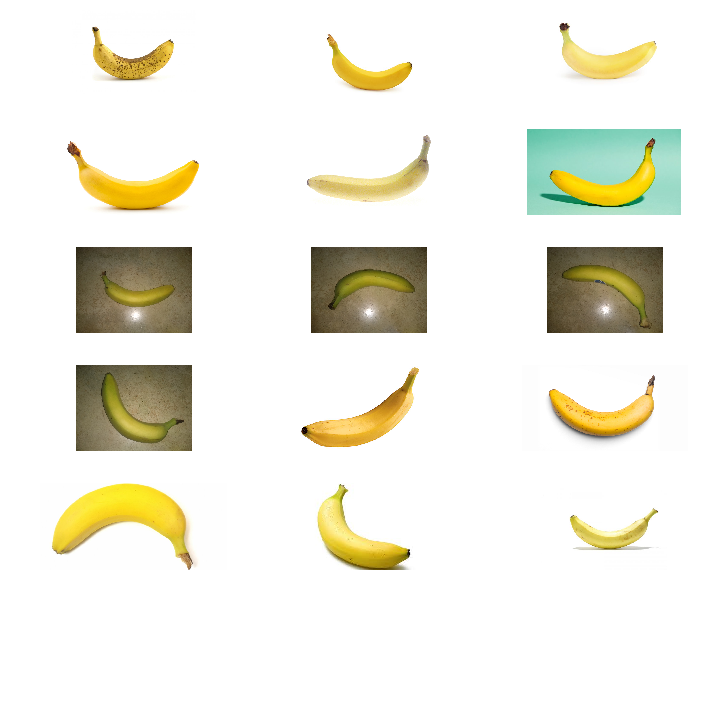

In [76]:
f, axes = plt.subplots(nrows=len(banana) // 3 + 1, ncols=3, figsize=(10, 10))

axes = axes.ravel()

for ax in axes:
    ax.axis('off')

for i, image in enumerate(banana):
    axes[i].imshow(image, cmap='gray')
    
plt.tight_layout()

## Naranjas

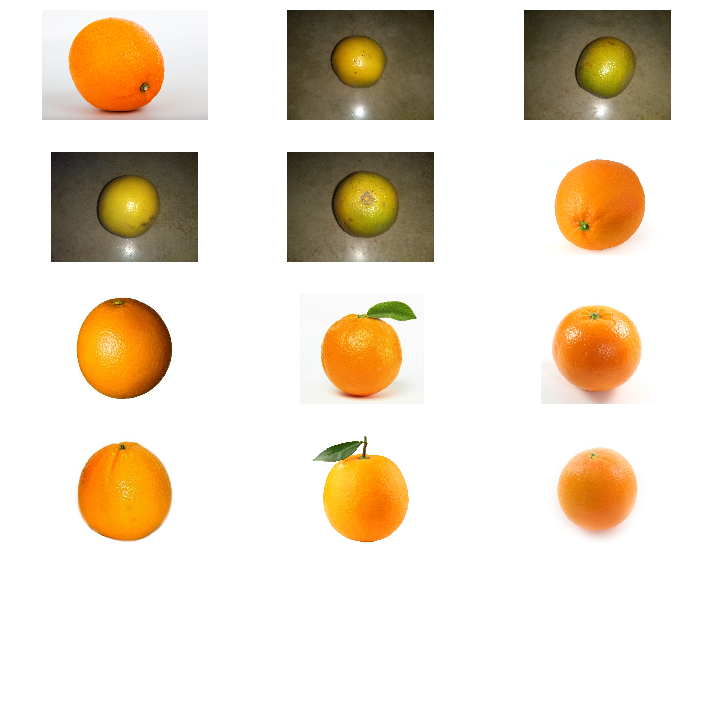

In [77]:
f, axes = plt.subplots(nrows=len(orange) // 3 + 1, ncols=3, figsize=(10, 10))

axes = axes.ravel()

for ax in axes:
    ax.axis('off')

for i, image in enumerate(orange):
    axes[i].imshow(image, cmap='gray')
    
plt.tight_layout()

## Limones

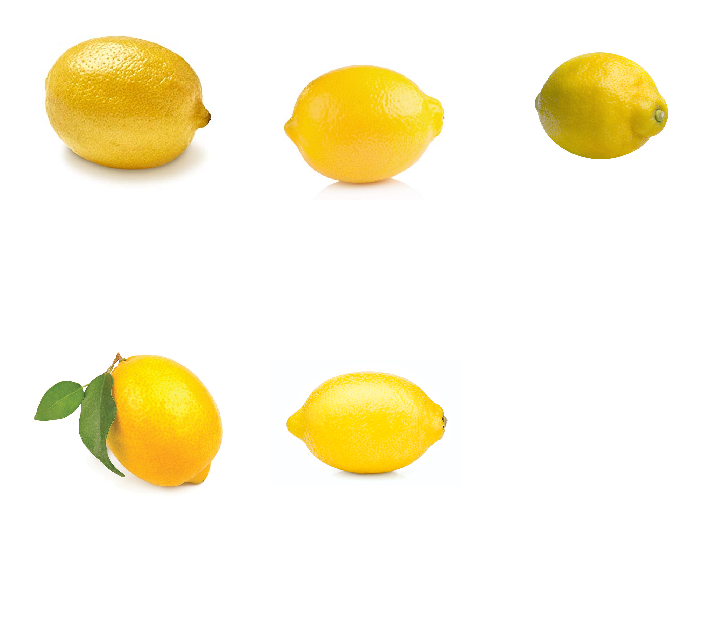

In [78]:
f, axes = plt.subplots(nrows=len(lemon) // 3 + 1, ncols=3, figsize=(10, 10))

# subplots returns the figure and an array of axes
# we use `axes.ravel()` to turn these into a list
axes = axes.ravel()

for ax in axes:
    ax.axis('off')

for i, image in enumerate(lemon):
    axes[i].imshow(image, cmap='gray')
    #axes[i].set_title(os.path.basename(ic.files[i]))
    
plt.tight_layout()

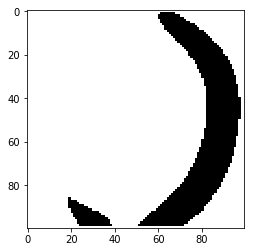

In [19]:
img_float = img_as_float(lemon[4])
img = color.rgb2gray(img_float)
bg = filters.gaussian(img, sigma=7)
bc = filters.sobel(bg)

th = filters.threshold_otsu(bc)
bf = bc < th

f, ax = plt.subplots()

ax.imshow(bf)

In [20]:
print(img.shape)

(100, 100)


# Comparación

### Entre naranja, banana y limón

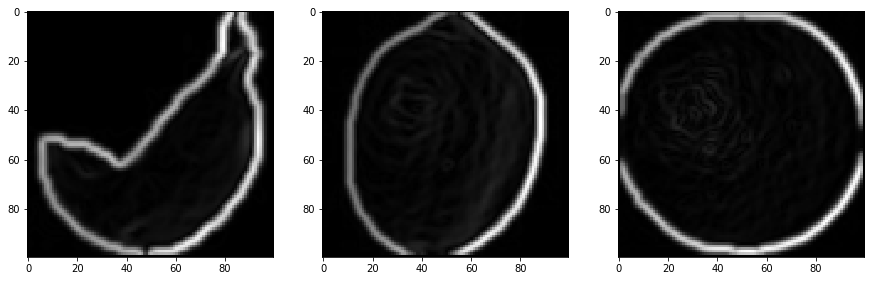

In [35]:
l4 = lemon[4]
l4 = normSize(l4)
l4 = img2grey(l4, mode='cv')
l4 = imgClean(l4)

b4 = banana[4]
b4 = normSize(b4)
b4 = img2grey(b4, mode='cv')
b4 = imgClean(b4)

o4 = orange[4]
o4 = normSize(o4)
o4 = img2grey(o4, mode='cv')
o4 = imgClean(o4)

lc = imgEdge(l4)
bc = imgEdge(b4)
oc = imgEdge(o4)

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 15))

ax0.imshow(bc)
ax1.imshow(lc)
ax2.imshow(oc)

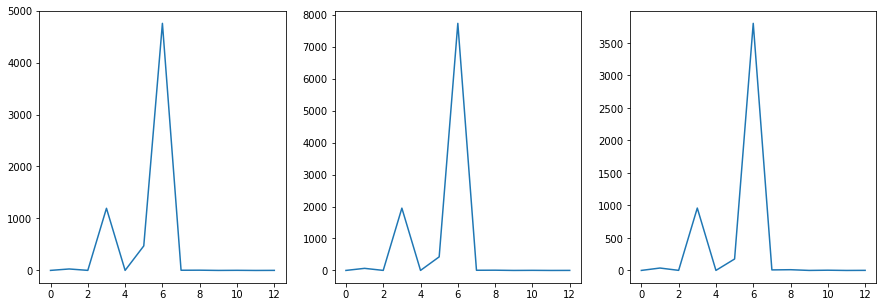

In [80]:
b_fht = haralick(b4)
l_fht = haralick(l4)
o_fht = haralick(o4)

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))

ax0.plot(b_fht)
ax1.plot(l_fht)
ax2.plot(o_fht)

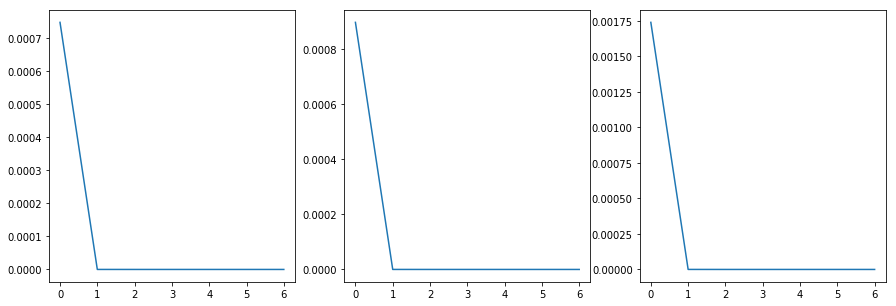

In [81]:
b_fhm = hu_moments(b4)
l_fhm = hu_moments(l4)
o_fhm = hu_moments(o4)

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))

ax0.plot(b_fhm)
ax1.plot(l_fhm)
ax2.plot(o_fhm)

### Entre tres bananas diferentes

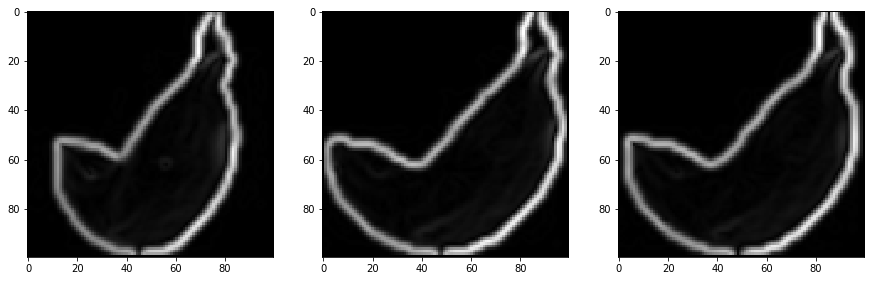

In [36]:
b1 = banana[8]
b1 = normSize(b1)
b1 = img2grey(b1, mode='cv')
b1 = imgClean(b1, mode='cv')
#b1 = float2int(b1)

b2 = banana[2]
b2 = normSize(b2)
b2 = img2grey(b2, mode='cv')
b2 = imgClean(b2, mode='cv')
#b2 = float2int(b2)

b3 = banana[3]
b3 = normSize(b3)
b3 = img2grey(b3, mode='cv')
b3 = imgClean(b3, mode='cv')
#b3 = float2int(b3)

bc1 = imgEdge(b1)
bc2 = imgEdge(b2)
bc3 = imgEdge(b3)

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 15))

ax0.imshow(bc1)
ax1.imshow(bc2)
ax2.imshow(bc3)

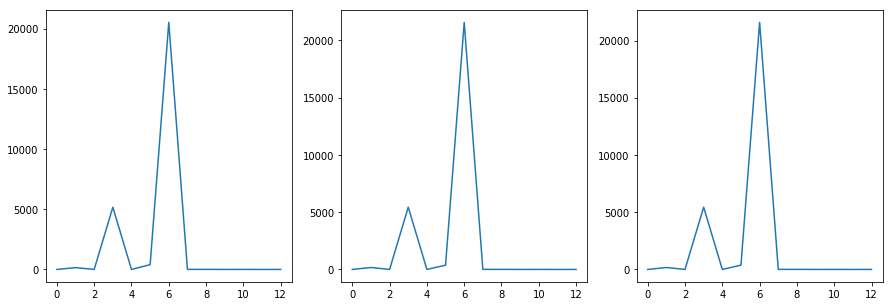

In [37]:
b1_fht = haralick(b1)
b2_fht = haralick(b2)
b3_fht = haralick(b3)

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))

ax0.plot(b1_fht)
ax1.plot(b2_fht)
ax2.plot(b3_fht)

In [28]:
b1_fht = hu_moments(b1)
b2_fht = hu_moments(b2)
b3_fht = hu_moments(b3)

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))

ax0.plot(b1_fht)
ax1.plot(b2_fht)
ax2.plot(b3_fht)

error: OpenCV(3.4.4) /io/opencv/modules/imgproc/src/moments.cpp:696: error: (-210:Unsupported format or combination of formats)  in function 'moments'


## Extracción de características de toda la base de datos

In [143]:
class Elemento:
    def __init__(self):
        self.label = None
        self.image = None
        self.feature = []
        self.distance = 0

In [203]:
from sklearn.preprocessing import MinMaxScaler

data = []
i = 0
for fruit in banana:
    
    data.append(Elemento())
    data[i].label = 'banana'
    b = fruit
    b = normSize(b)
    data[i].image = img2grey(b, mode='cv')
    
    ft_haralick = haralick(data[i].image)
    ft_hu_moments = hu_moments(data[i].image)
    global_ft = np.hstack([ft_haralick, ft_hu_moments])
    
    data[i].feature = global_ft.reshape(1, -1)
    i += 1
    
for fruit in lemon:
    
    data.append(Elemento())
    data[i].label = 'lemon'
    b = fruit
    b = normSize(b)
    data[i].image = img2grey(b, mode='cv')
    
    ft_haralick = haralick(data[i].image)
    ft_hu_moments = hu_moments(data[i].image)
    global_ft = np.hstack([ft_haralick, ft_hu_moments])
    
    data[i].feature = global_ft.reshape(1, -1)
    i += 1
    
for fruit in orange:
    
    data.append(Elemento())
    data[i].label = 'orange'
    b = fruit
    b = normSize(b)
    data[i].image = img2grey(b, mode='cv')
    
    ft_haralick = haralick(data[i].image)
    ft_hu_moments = hu_moments(data[i].image)
    global_ft = np.hstack([ft_haralick, ft_hu_moments])
    
    data[i].feature = global_ft.reshape(1, -1)
    i += 1

In [145]:
print(len(data))
print(data[0].feature)
print(data[0].feature[0][0])

1491
[[ 1.44725171e-01  2.30815349e+02  9.79337594e-01  5.58402530e+03
   6.13103278e-01  3.74029988e+02  2.21052859e+04  5.39728569e+00
   6.79348434e+00  1.12324795e-03  2.91346970e+00 -5.36084597e-01
   9.96454526e-01  9.27108026e-04  3.51322666e-09  1.29302237e-12
   2.36107470e-11  6.48625511e-23  1.39113332e-15 -1.13189646e-22]]
0.14472517065277526


## Test

In [204]:
test = Elemento()
aux = io.imread('./test/test2.jpg')
# FALTA NORMALIZAR!
test.image = img2grey(aux, mode='cv')

test_fht = haralick(test.image)
test_fhm = hu_moments(test.image)
aux = np.hstack([test_fht, test_fhm])
test.feature = aux.reshape(1, -1)

test.label = data[0].label

# Algoritmo K-nn (K-nearest neighbors)
---

In [167]:
distance = []

i = 0
sum = 0
for feature in data[0].feature[0]:
        sum = sum + np.power(np.abs(test.feature[0][i] - feature), 2)
        i += 1
d = np.sqrt(sum)

for element in data:
    sum = 0
    i = 0
    for feature in (element.feature[0]):
        sum = sum + np.power(np.abs((test.feature[0][i]) - feature), 2)
        i += 1
    
    element.distance = np.sqrt(sum)
    distance.append(np.sqrt(sum))
    if (sum < d):
        d = sum
        test.label = element.label
        #print(sum)
    #print(element.distance)
print(test.label)

orange


Se ordena la información según la distancia al elemento a analizar:

In [124]:
 #Bubblesort
swap = True
while (swap):
    swap = False
    for i in range(1, len(data)-1) :
        if (data[i-1].distance > data[i].distance):
            aux = data[i]
            data[i] = data[i-1]
            data[i-1] = aux
            swap = True

In [125]:
k = 10
for i in range(k):
    print(data[i].label)

orange
orange
orange
orange
banana
banana
banana
banana
banana
banana


# K-means
---

In [205]:
b_flag = True
o_flag = True
l_flag = True
i = 0

banana_data = []
orange_data = []
lemon_data = []

while (b_flag or o_flag or l_flag):
    if (data[i].label == 'banana' and b_flag):
        b_mean = data[i].feature[0]
        #print("first mean banana", b_mean)
        #banana_data.append(b_mean)
        b_flag = False
    if (data[i].label == 'orange' and o_flag):
        o_mean = data[i].feature[0]
        #print("first mean orange", o_mean)
        #orange_data.append(o_mean)
        o_flag = False
    if (data[i].label == 'lemon' and l_flag):
        l_mean = data[i].feature[0]
        #print("first mean lemon", l_mean)
        #lemon_data.append(l_mean)
        l_flag = False
    i += 1
    
iter = 0

while (iter < 100):

    # ASIGNACION

    for element in data:

        sum_b = 0
        sum_o = 0
        sum_l = 0

        i = 0
        for feature in (element.feature[0]):
            sum_b += np.power(np.abs(b_mean[i] - feature), 2)
            sum_o += np.power(np.abs(o_mean[i] - feature), 2)
            sum_l += np.power(np.abs(l_mean[i] - feature), 2)
            i += 1

        dist_b = np.sqrt(sum_b)
        dist_o = np.sqrt(sum_o)
        dist_l = np.sqrt(sum_l)

        if ((dist_b <= dist_o) and (dist_b <= dist_l)):
            element.label = 'banana'
            banana_data.append(element.feature[0])
        elif ((dist_o <= dist_b) and (dist_o <= dist_l)):
            element.label = 'orange'
            orange_data.append(element.feature[0])
        elif ((dist_l <= dist_b) and (dist_l <= dist_o)):
            element.label = 'lemon'
            lemon_data.append(element.feature[0])

    # ACTUALIZACION

    i = 0

    sum_b = 0
    sum_o = 0
    sum_l = 0

    for i in range(0, len(data[0].feature[0])-1):

        for b in banana_data:
            sum_b += b[i]
        for o in orange_data:
            sum_o += o[i]
        for l in lemon_data:
            sum_l += l[i]

        b_mean[i] = sum_b / len(banana_data)
        o_mean[i] = sum_o / len(orange_data)
        l_mean[i] = sum_l / len(lemon_data)

    # CONDICION DE SALIDA (Por ahora por cantidad de iteraciones)
    iter += 1

In [206]:
sum_b = 0
sum_o = 0
sum_l = 0

for i in range(0, len(test.feature[0])-1):
    sum_b += np.power(np.abs(test.feature[0][i] - b_mean[i]), 2)
    sum_o += np.power(np.abs(test.feature[0][i] - o_mean[i]), 2)
    sum_l += np.power(np.abs(test.feature[0][i] - l_mean[i]), 2)

dist_b = np.sqrt(sum_b)
dist_o = np.sqrt(sum_o)
dist_l = np.sqrt(sum_l)
print(dist_b, dist_o, dist_l)
    
if ((dist_b <= dist_o) and (dist_b <= dist_l)):
    test.label = 'banana'
if ((dist_o <= dist_b) and (dist_o <= dist_l)):
    test.label = 'orange'
if ((dist_l <= dist_b) and (dist_l <= dist_o)):
    test.label = 'lemon'
    
print(test.label)

6490340.261237329 616561.1826086706 93136.07696058726
lemon
